In [12]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    'log.csv',
    sep=',',
    decimal='.'
)

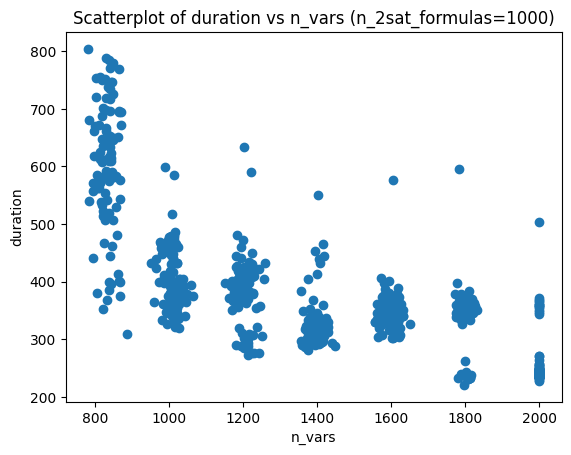

In [16]:
filtered_df = df[(df['n_sol']==100) & (df['n_2sat_formulas']==1000) & (df['min_dist']==10) & (df['parallel']==1)]
plt.scatter(filtered_df['n_vars'], filtered_df['duration'])
plt.xlabel('n_vars')
plt.ylabel('duration')
plt.title('Scatterplot of duration vs n_vars (n_2sat_formulas=1000)')
plt.show()

<Figure size 1000x600 with 0 Axes>

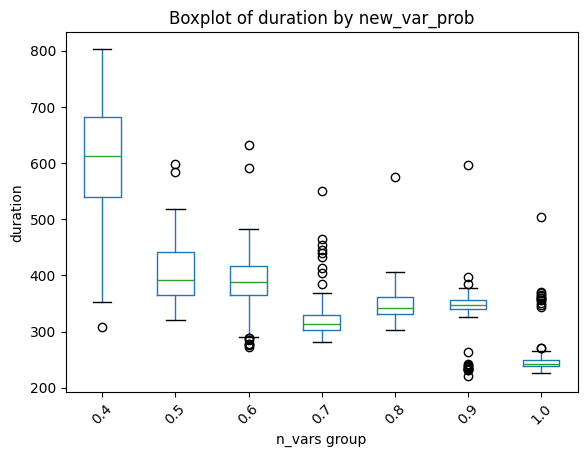

In [ ]:
plt.figure(figsize=(10, 6))
filtered_df.boxplot(column='duration', by='new_var_prob', grid=False)
plt.title('Boxplot of duration by new_var_prob')
plt.suptitle('')
plt.xlabel('n_vars group')
plt.ylabel('duration')
plt.show()

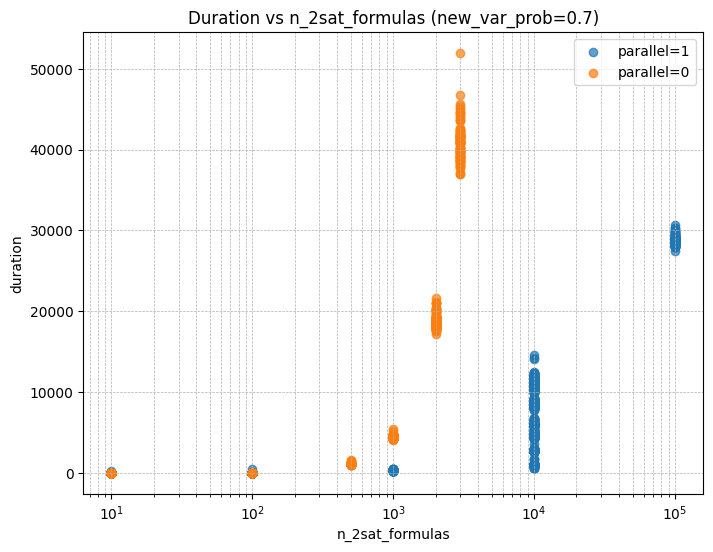

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv(
    'log.csv',
    sep=',',
    decimal='.'
)
subset = df[(df['new_var_prob'] == 0.7)].iloc[:1700]
group_parallel_1 = subset[subset['parallel'] == 1]
group_parallel_0 = subset[subset['parallel'] == 0]

plt.figure(figsize=(8, 6))
plt.scatter(group_parallel_1['n_2sat_formulas'], group_parallel_1['duration'], label='parallel=1', alpha=0.7)
plt.scatter(group_parallel_0['n_2sat_formulas'], group_parallel_0['duration'], label='parallel=0', alpha=0.7)
plt.xlabel('n_2sat_formulas')
plt.ylabel('duration')
plt.title('Duration vs n_2sat_formulas (new_var_prob=0.7)')
plt.xscale('log')
plt.legend()
plt.grid(True, which="both", ls="--", linewidth=0.5)
plt.show()

Text(0, 0.5, 'duration')

<Figure size 1200x500 with 0 Axes>

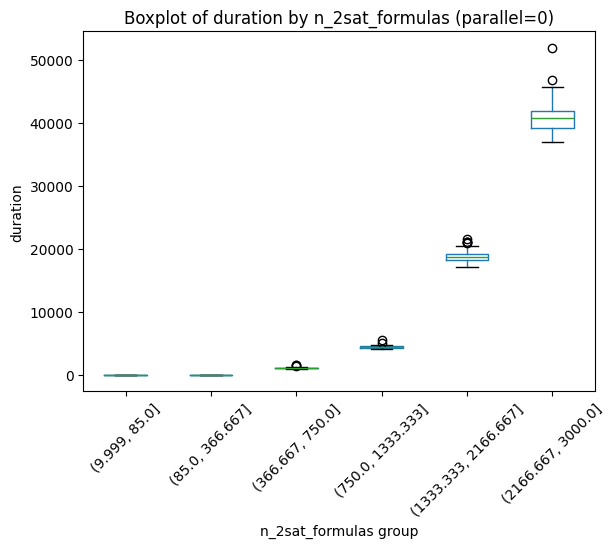

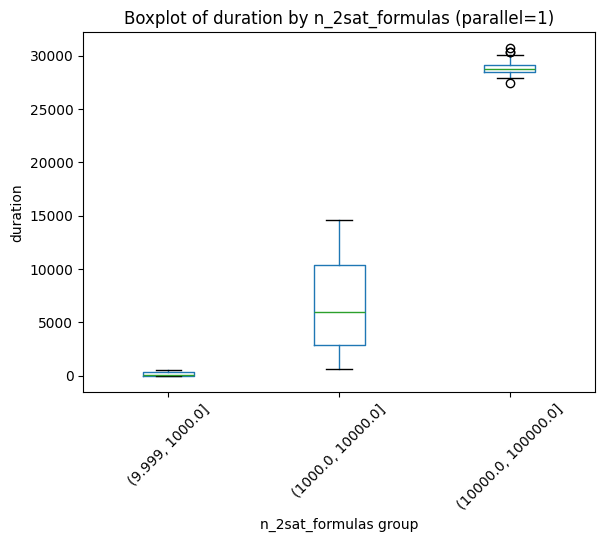

In [10]:
# For group_parallel_0: split into 6 bins by n_2sat_formulas
group_parallel_0.loc[:, 'n_2sat_formulas_group'] = pd.qcut(group_parallel_0['n_2sat_formulas'], q=6, duplicates='drop')
plt.figure(figsize=(12, 5))
group_parallel_0.boxplot(column='duration', by='n_2sat_formulas_group', grid=False, rot=45)
plt.title('Boxplot of duration by n_2sat_formulas (parallel=0)')
plt.suptitle('')
plt.xlabel('n_2sat_formulas group')
plt.ylabel('duration')

# For group_parallel_1: split into 5 bins by n_2sat_formulas
group_parallel_1.loc[:, 'n_2sat_formulas_group'] = pd.qcut(group_parallel_1['n_2sat_formulas'], q=5, duplicates='drop')
group_parallel_1.boxplot(column='duration', by='n_2sat_formulas_group', grid=False, rot=45)
plt.title('Boxplot of duration by n_2sat_formulas (parallel=1)')
plt.suptitle('')
plt.xlabel('n_2sat_formulas group')
plt.ylabel('duration')